<a href="https://colab.research.google.com/github/umang-algo/plaksha_projects/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [ ]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
principalDf

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [ ]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

In [ ]:
finalDf

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


In [ ]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [ ]:
train_x = finalDf.iloc[:,:-1]

In [ ]:
train_x

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [ ]:
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train_img)
# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [ ]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

In [ ]:
pca.fit(train_img)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [ ]:
logisticRegr.fit(train_img, train_lbl)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Predict for One Observation (image)
logisticRegr.predict(test_img[0].reshape(1,-1))

array(['0'], dtype=object)

In [ ]:
# Predict for One Observation (image)
logisticRegr.predict(test_img[0:10])

array(['0', '4', '1', '2', '4', '7', '7', '1', '1', '7'], dtype=object)

In [ ]:
logisticRegr.score(test_img, test_lbl)

0.9201

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor()
model.fit(train_img, train_lbl)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
# Predict for One Observation (image)
model.predict(test_img[0:10])

array([1.7 , 4.01, 1.52, 2.25, 5.79, 5.07, 6.97, 1.21, 1.  , 6.43])

In [ ]:
print(model.feature_importances_)

[0.10743481 0.03001427 0.1384499  0.02556209 0.15465299 0.02892833
 0.01940266 0.02758796 0.01705112 0.03890664 0.04909376 0.00601762
 0.03045033 0.02685237 0.01023458 0.01603326 0.00697666 0.00272855
 0.0085287  0.00877549 0.00458235 0.00281757 0.00945909 0.00651451
 0.00847762 0.00584338 0.0018051  0.00595131 0.0019201  0.00434933
 0.00235997 0.00170545 0.00190634 0.00236486 0.00163223 0.01098694
 0.00361129 0.0013952  0.00341255 0.00316002 0.00126694 0.00194707
 0.00160193 0.00152673 0.00113612 0.00135335 0.00166364 0.00092246
 0.0011828  0.00082482 0.00556495 0.00183227 0.00160899 0.00075027
 0.00386913 0.00086328 0.00212425 0.00101612 0.00102471 0.00093199
 0.00096839 0.00055517 0.00153906 0.0011808  0.00105275 0.0009441
 0.00173169 0.00071604 0.00118635 0.00100797 0.00087429 0.00068685
 0.00086597 0.0030683  0.00068314 0.00089272 0.00052171 0.00114467
 0.00093804 0.00078888 0.0009143  0.00442525 0.00084241 0.00070808
 0.00116521 0.00081739 0.00092023 0.000573   0.00086248 0.00086

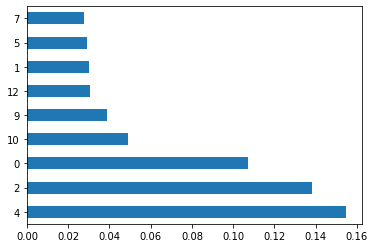

In [ ]:
feat_importances = pd.Series(model.feature_importances_)
feat_importances.nlargest(9).plot(kind='barh')
plt.show()